
# Week 5 — Exploring Variable Associations

In this practical notebook you'll learn to **explore relationships between variables** using:
- **Scatter plots** and **pair plots**
- **Linear and non-linear associations**
- **Pearson** and **Spearman** correlations
- **Strength vs. significance** (effect size vs p-value)

We will use classic open datasets (via `seaborn`) such as **penguins**, **mpg**, **tips**, and **anscombe**.
Each section mixes **brief explanations**, **worked examples**, and **exercises** for you to practice.


## Setup

In [ ]:
# if you have not installed these packages yet, uncomment and run the following lines:
#!pip install seaborn
#!pip install scipy

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

pd.set_option("display.max_rows", 10)
pd.set_option("display.precision", 3)
sns.set_theme(context="notebook")

penguins = sns.load_dataset("penguins").dropna()
mpg = sns.load_dataset("mpg").dropna()
tips = sns.load_dataset("tips").dropna()
anscombe = sns.load_dataset("anscombe")

penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male



## 1. Scatter Plots


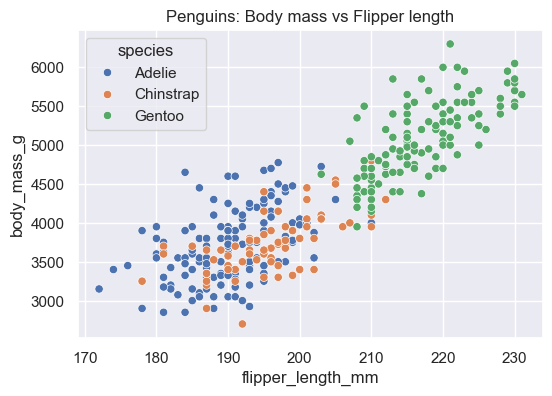

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species", ax=ax)
ax.set_title("Penguins: Body mass vs Flipper length")
plt.show()


### Exercise 1 — Basic scatter
Create a scatter plot of **bill length vs bill depth** for penguins and color by species.
- Add modest transparency (`alpha`) to handle overplotting.
- Briefly interpret the shape and separation between species.


In [ ]:
# Your code here


## 2. Pair Plots

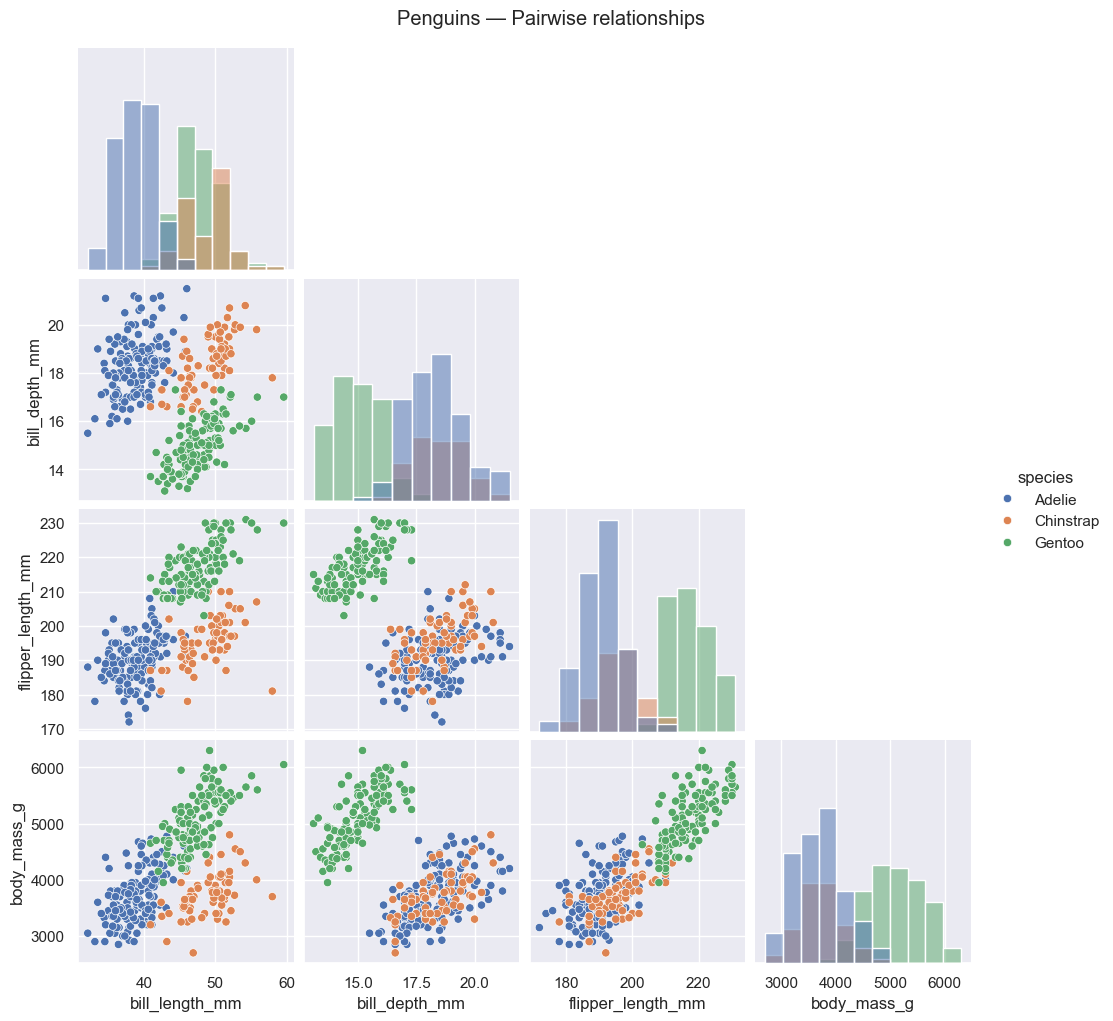

In [ ]:
num_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
sns.pairplot(penguins[num_cols + ["species"]], hue="species", diag_kind="hist", corner=True)
plt.suptitle("Penguins — Pairwise relationships", y=1.02)
plt.show()


The pair plot is a great way to visualize relationships between multiple variables at once. It creates a matrix of scatter plots for each pair of variables, along with histograms or density plots on the diagonal.

### Exercise 2 — Pair plot with a subset
Using the **mpg** dataset, create a pair plot for the variables `["mpg", "horsepower", "weight", "acceleration"]`.
- Use `hue="origin"`.
- Use `corner=True`.
- Briefly describe any non-linear patterns you notice.


In [ ]:
# Your code here


## 3. Linear and Non-linear Associations

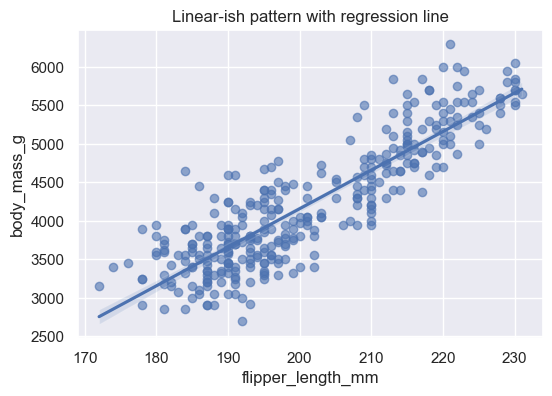

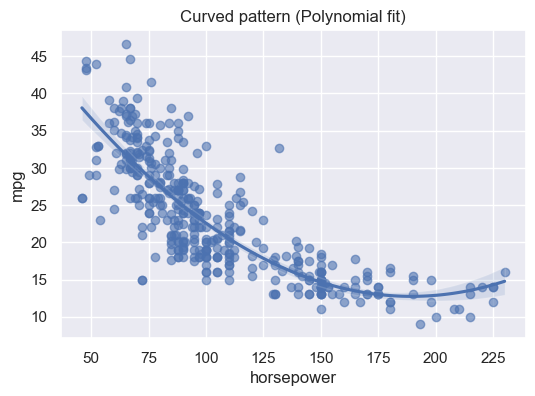

In [4]:

fig, ax = plt.subplots(figsize=(6, 4))
sns.regplot(data=penguins, x="flipper_length_mm", y="body_mass_g", ax=ax, scatter_kws=dict(alpha=0.6))
ax.set_title("Linear-ish pattern with regression line")
plt.show()

fig, ax = plt.subplots(figsize=(6, 4))
sns.regplot(data=mpg, x="horsepower", y="mpg", order=2, ax=ax, scatter_kws=dict(alpha=0.6))
ax.set_title("Curved pattern (Polynomial fit)")
plt.show()


### Exercise 3 — Non-linear detection
Using **tips**, check whether `total_bill` and `tip` are strictly linear.  
1. Draw a regular scatter plot.  
2. Overlay a straight regression line.  
3. Overlay a quadratic (`order=2`) regression and compare the visual fit.


In [ ]:
# Your code here


## 4. Pearson vs Spearman Correlations

Pearson r = -0.778 (p = 7.03e-81)
Spearman r = -0.854 (p = 1.62e-112)


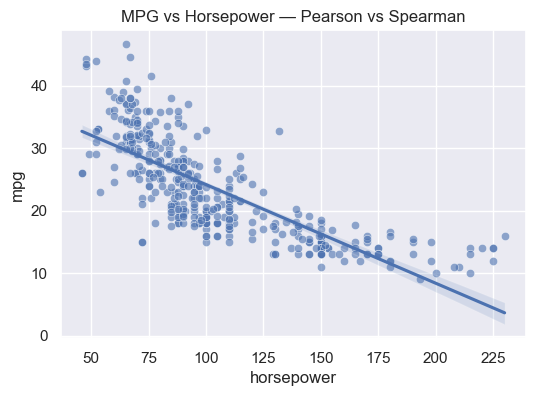

In [ ]:
x = mpg["horsepower"]
y = mpg["mpg"]

r_pearson, p_pearson = pearsonr(x, y)
r_spearman, p_spearman = spearmanr(x, y)

print(f"Pearson r = {r_pearson:.3f} (p = {p_pearson:.2e})")
print(f"Spearman r = {r_spearman:.3f} (p = {p_spearman:.2e})")

fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(x=x, y=y, ax=ax, alpha=0.6)
sns.regplot(x=x, y=y, ax=ax, scatter=False, color=None)
ax.set_title("MPG vs Horsepower — Pearson vs Spearman")
plt.show()


### Exercise 4 — Monotonic but non-linear
Create a **synthetic** dataset where `y = log(x) + noise` for `x` in `[1, 100]`.  
- Compute **Pearson** and **Spearman** correlations between `x` and `y`.  


In [12]:
# Your code here



`Note`: Pearson correlation captures linear relationships, while Spearman correlation captures monotonic relationships.

- if your data is linear, both correlations will be high and similar.
- if your data is monotonic but non-linear, Spearman will be higher than Pearson.
- when there is a curvy relationship, Pearson may be low even if there is a strong association while Spearman will be high.

## 5. Strength vs Significance (Effect size vs p-value)

In [ ]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

rng = np.random.default_rng(7)

def simulate_corr(n=50, true_r=0.2, noise=1.0, seed=None):
    rng = np.random.default_rng(seed)
    x = rng.normal(size=n)
    y = true_r * x + rng.normal(scale=noise, size=n)
    rp, pp = pearsonr(x, y)
    rs, ps = spearmanr(x, y)
    return rp, pp, rs, ps

for n in [30, 100, 1000, 10000]:
    rp, pp, rs, ps = simulate_corr(n=n, true_r=0.08, noise=1.0, seed=123)
    print(f"n={n:<5} | Pearson r={rp:.3f}, p={pp:.2e} | Spearman r={rs:.3f}, p={ps:.2e}")


### Exercise 5 — Visualize strength vs significance
1. For sample sizes `n = [25, 50, 100, 500, 2000]`, simulate correlations from a weak linear process (true_r ≈ 0.1).  
2. For each `n`, run, say, 200 trials and collect the distribution of **Pearson r** and p-values.  
3. Summarize with a small table and comment on how often `p < 0.05` occurs as `n` grows.


In [ ]:
# Your code here


## 6. Case Study — Multi-variable associations

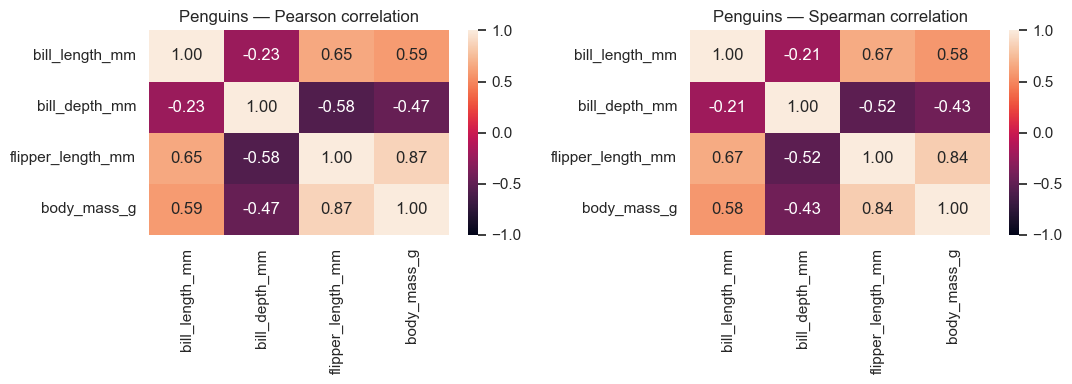

In [ ]:
num_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
pearson_corr = penguins[num_cols].corr(method="pearson")
spearman_corr = penguins[num_cols].corr(method="spearman")

fig, axes = plt.subplots(1, 2, figsize=(11, 4))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("Penguins — Pearson correlation")
sns.heatmap(spearman_corr, annot=True, fmt=".2f", vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("Penguins — Spearman correlation")
plt.tight_layout()
plt.show()


### Exercise 6 — Top correlated pairs
Using **mpg**, compute the Pearson correlation matrix for `["mpg","displacement","horsepower","weight","acceleration"]`.  
- List the **top 3 strongest negative** and **top 3 strongest positive** correlations (by absolute value).  
- Briefly explain any domain intuition (e.g., heavier cars → lower mpg).


In [ ]:
# Your code here


## 7. Be careful — Outliers and Anscombe's Quartet

In [ ]:
g = sns.FacetGrid(anscombe, col="dataset", col_wrap=2, height=3, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="x", y="y", alpha=0.8)
g.set_titles(col_template="Anscombe {col_name}")
for ax, (_, sub) in zip(g.axes.flatten(), anscombe.groupby("dataset")):
    sns.regplot(data=sub, x="x", y="y", scatter=False, ax=ax, ci=None)
plt.tight_layout()
plt.show()



## 8. Summary & Checklist
- Use **scatter plots** and **pair plots** to visualize relationships.
- Decide between **Pearson** (linear) and **Spearman** (monotonic) correlations.
- Consider both **effect size** (strength) and **statistical significance**.
- **Visualize** to detect outliers, non-linear patterns, and clusters.
- Provide **domain interpretation** — numbers alone rarely tell the full story.



# 9. Comprehensive EDA Practice — Exploring Diamonds

Apply a complete **EDA workflow** on **`diamonds`**:
univariate, bivariate, multivariate, non-linear patterns, and insights.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(context="notebook")
diamonds = sns.load_dataset("diamonds")
diamonds.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 9.1 Dataset Overview and Cleaning

Inspect structure, missing values, and summary statistics

In [ ]:
# Your code here


## 9.2 Univariate Exploration

Plot distributions for 'carat' and 'price' and a boxplot of 'price' by 'cut'

In [ ]:
# Your code here


## 9.3 Bivariate Analysis (Numerical–Numerical)

Scatter carat vs price (hue=cut) + Pearson & Spearman correlations

In [ ]:
# Your code here


## 9.4 Categorical vs Numerical Relationships

Boxplot of price by color and cut

In [ ]:
# Your code here


## 9.5 Correlation and Multivariate View

Compute and plot correlation matrix; list top correlations with price

In [ ]:
# Your code here


## 9.6 Mini Challenges


**Solve:**
1) Which variable correlates most strongly with **price**?  
2) How does **clarity** impact price when **controlling for carat**?  
3) Top **3 most expensive** diamonds per **cut**.  
4) Are higher-quality **cuts** also **heavier (carat)** on average?  
5) Visualize **depth vs price** and discuss the **strength** of that relationship.


In [ ]:
# Your code here


## 9.7 Summary & Reflection


Write a short narrative summarizing your insights: main drivers of price, linear vs non-linear patterns, role of categorical factors.


In [ ]:
# Your narrative here